In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

## 子图
- 使用subplots()绘制均匀子图
- 使用gridspec绘制非均匀子图

### 使用plt.subplots()绘制均匀子图
- figsize指定整个画布的大小
- sharex和sharey分别代表是否共享横轴和纵轴
- tight_layout可以调整子图的相对大小使字符不会重叠

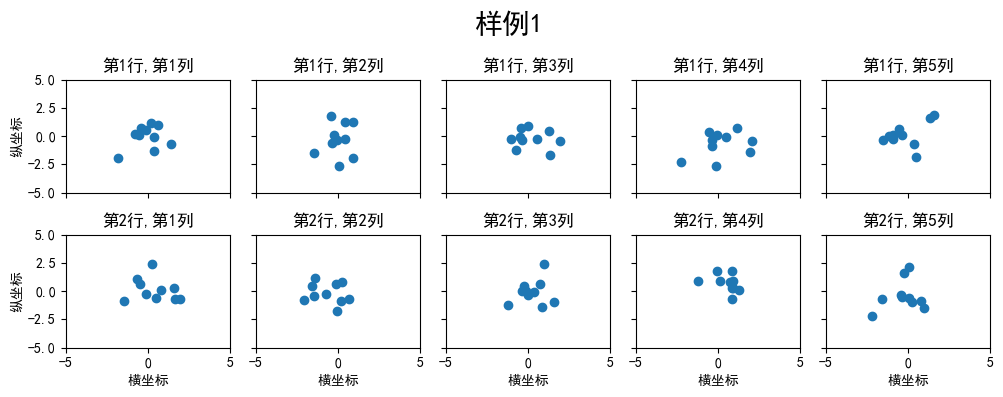

In [8]:
# 使用OO模式创建axes对象绘图
fig,axs = plt.subplots(2,5,figsize=(10,4),sharex=True,sharey=True)
fig.suptitle('样例1',size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10),np.random.randn(10))
        axs[i][j].set_title('第%d行,第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

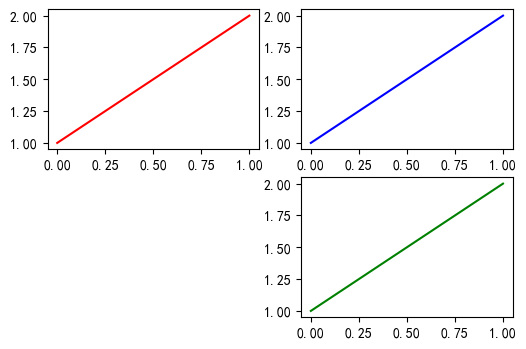

In [9]:
# 使用plplot模式绘图
plt.figure(figsize=(6,4)) #创建画布
# 绘制子图1
plt.subplot(2,2,1)
plt.plot([1,2],'r')
# 绘制子图2
plt.subplot(2,2,2)
plt.plot([1,2],'b')
# 绘制子图3
plt.subplot(224)
plt.plot([1,2],'g');

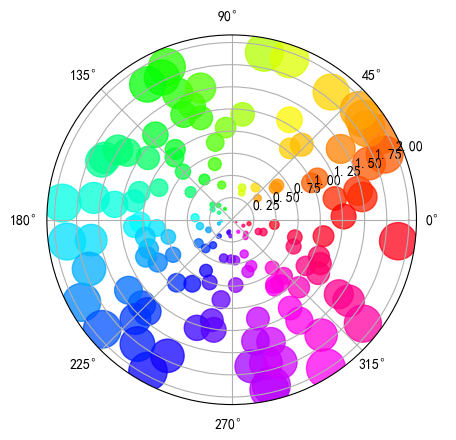

In [ ]:
''' 
除了常规的直角坐标系，也可以通过projection方法创建极坐标系下的图表
'''
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75);

### 使用GridSpec绘制非均匀子图
- 所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态
- 利用 add_gridspec 可以指定相对宽度比例 width_ratios 和相对高度比例参数 height_ratios
- 可以直接在创建画布的时候就使用gridspec_kw参数来指定非均匀子图

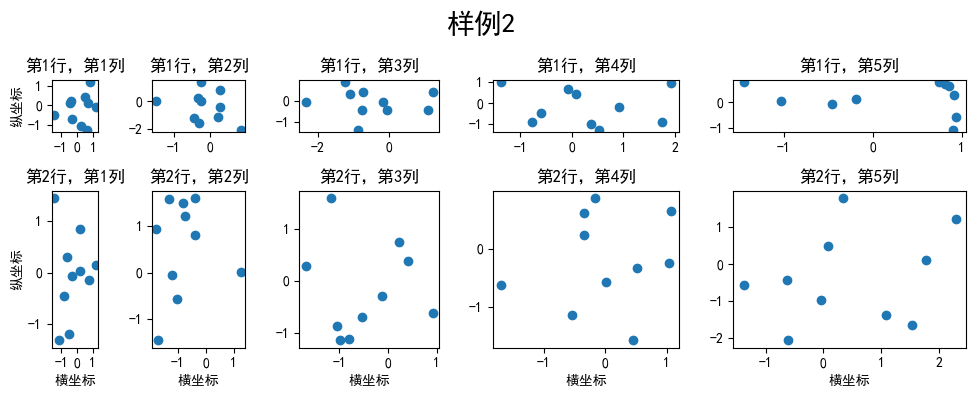

In [11]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

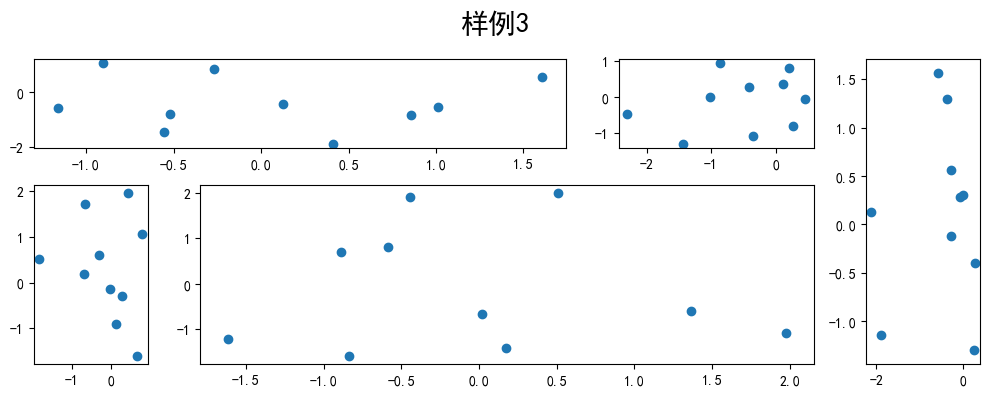

In [ ]:
''' 
在上面的例子中出现了 spec[i, j] 的用法，
事实上通过切片就可以实现子图的合并而达到跨图的共能
'''
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

## 子图上的方法
- 常用直线的画法：
    - axhline,axvline,axline
- 使用grid添加网格线
- 使用set_xscale设置坐标轴的规度

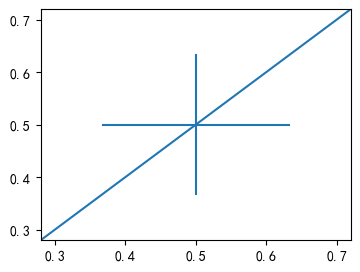

In [ ]:
# 绘制直线
fig,ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8) #水平线 y,x1,x2 
ax.axvline(0.5,0.2,0.8) #垂直线 x,y1,y2
ax.axline([0.3,0.3],[0.7,0.7]); #任意线,从(x1,y1)到(x2,y2)

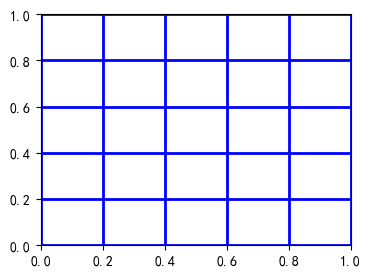

In [17]:
# 绘制网格线
fig,ax = plt.subplots(figsize=(4,3))
ax.grid(True,color='b',lw=2);

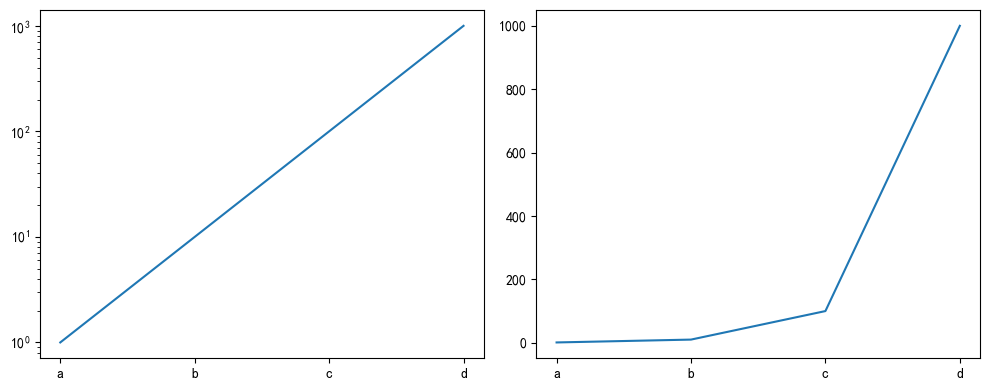

In [ ]:
# 使用set_xscale/set_yscale设置坐标轴规度(指对数坐标)
fig,axs = plt.subplots(1,2,figsize=(10,4))
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
    else:
        pass
fig.tight_layout()

## practice

In [24]:
df = pd.read_csv('../data/layout_ex1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         120 non-null    object 
 1   Temperature  120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [25]:
df.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


In [43]:
df['year'] = pd.to_datetime(df.Time,format='%Y-%m').dt.year
df['month'] = pd.to_datetime(df.Time,format='mixed').dt.month
df.head()

,Time,Temperature,year,month
0,1981-01,17.712903,1981,1
1,1981-02,17.678571,1981,2
2,1981-03,13.500000,1981,3
3,1981-04,12.356667,1981,4
4,1981-05,9.490323,1981,5


In [66]:
df1 = df[['year','month','Temperature']]
# df1.head()
df1.query('year == 1981').year.unique()

array([1981])

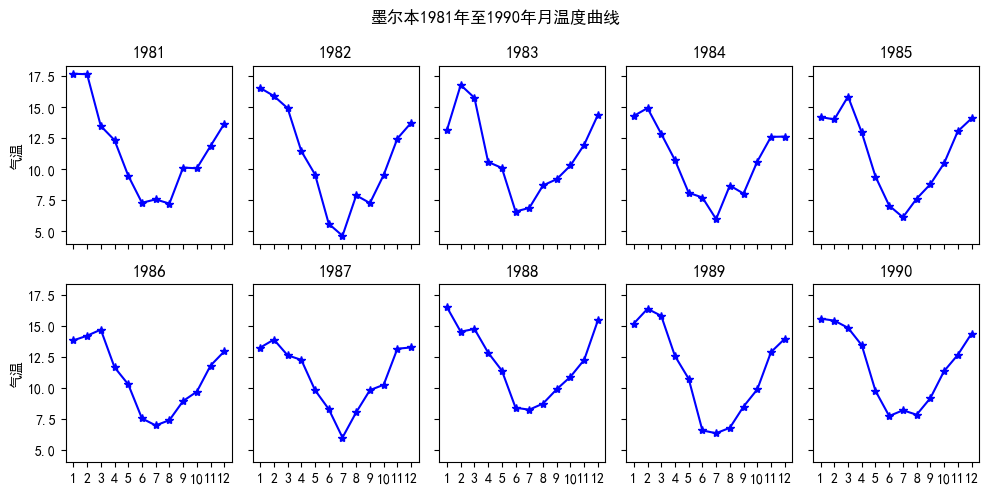

In [71]:
fig,axs = plt.subplots(2,5,figsize=(10,5),sharex=True,sharey=True)
fig.suptitle('墨尔本1981年至1990年月温度曲线')
for i in range(2):
    for j in range(5):
        if i == 0:
            data = df1.query(f'year=={1981+j}')
        else:
            data = df1.query(f'year=={1986+j}')
        axs[i][j].plot(data['month'],data['Temperature'],c='b',marker='*')
        axs[i][j].set_title(data.year.unique()[0])
        axs[i][j].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
        if j == 0:
            axs[i][j].set_ylabel('气温')
fig.tight_layout()

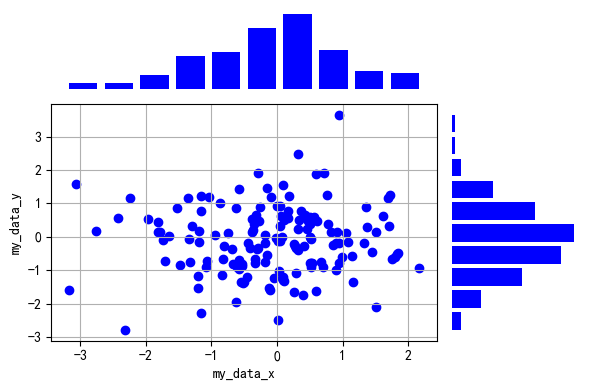

In [ ]:
# 非均匀子图的绘制方法一 使用设置比例的方法
x,y = np.random.randn(2,150)
fig = plt.figure(figsize=(6,4))
spec = fig.add_gridspec(nrows=2,ncols=2,width_ratios=[3,1],height_ratios=[1,3])

# 绘制主图散点图
ax1 = fig.add_subplot(spec[1,0])
ax1.scatter(x,y,color='b')
ax1.set_xlabel('my_data_x')
ax1.set_ylabel('my_data_y')
ax1.grid(True)

# 绘制x轴直方图
ax_x = fig.add_subplot(spec[0,0])
ax_x.hist(x,bins=10,color='b',rwidth=0.8)
ax_x.axis('off')

# 绘制y轴直方图
ax_y = fig.add_subplot(spec[1,1])
ax_y.hist(y,bins=10,color='b',orientation='horizontal',rwidth=0.8)
ax_y.axis('off')

fig.tight_layout()

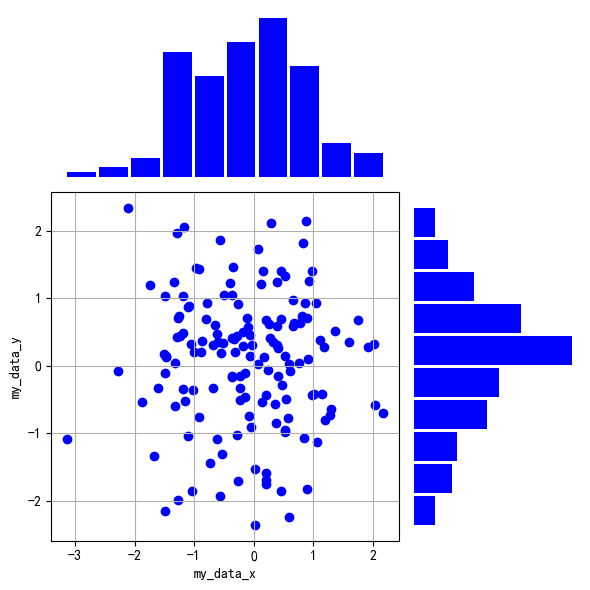

In [ ]:
# 非均匀子图的绘制方法二 使用切片的方法
x,y = np.random.randn(2,150)
fig = plt.figure(figsize=(6,6))
spec = fig.add_gridspec(nrows=3,ncols=3)

# 绘制散点图
ax1 = fig.add_subplot(spec[1:3,:2])
ax1.scatter(x,y,color='b')
ax1.set_xlabel('my_data_x')
ax1.set_ylabel('my_data_y')
ax1.grid(True)

# 绘制x轴边际图
ax_x = fig.add_subplot(spec[0,:2])
ax_x.hist(x,bins=10,color='b',rwidth=0.9)
ax_x.axis('off')

# 绘制y轴边际图
ax_y = fig.add_subplot(spec[1:3,2])
ax_y.hist(y,bins=10,color='b',orientation='horizontal',rwidth=0.9)
ax_y.axis('off')

fig.tight_layout()

In [ ]:
'''
绘制子图可以使用plt.add_subplots()来绘制均匀状态下的子图
也可以使用gridspec参数绘制非均匀状态下的子图
fig,axs = plt.add_subplots(2,2,figsize=(10,10),
                gridspec_kw={"width_ratios"=[3,1],"height_ratios"=[1,3]})
然后使用ax[i,j]来绘制每个子图


方法二 先创建画布fig 然后使用spec = fig.add_gridspec(nrow,ncols,width_ratios,width_ratios)       
实例化一个gridspec对象，然后使用ax1 = fig.add_subplot(spec[i,j])来绘制非均匀子图
可以使用width_rations和height_rations指定各个子图的比列，也可以创建多个相等的子图
然后使用切片的形式绘制非均匀子图
'''

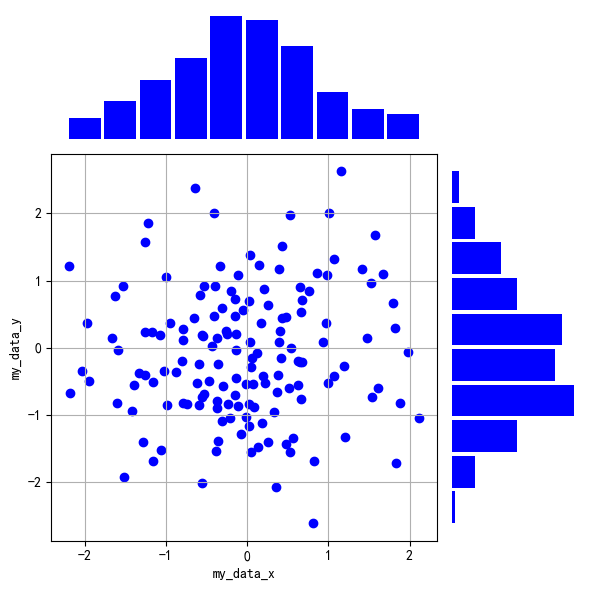

In [27]:
# 创建画布的时候直接指定gridspec创建非均匀子图
x,y = np.random.randn(2,150)
fig,axs = plt.subplots(2,2,figsize=(6,6),
                       gridspec_kw={'width_ratios':[3,1],'height_ratios':[1,3]})
# print(axs) 二维数组
# 绘制主图散点图
axs[1,0].scatter(x,y,color='b')
axs[1,0].set_xlabel('my_data_x')
axs[1,0].set_ylabel('my_data_y')
axs[1,0].grid(True)

# 绘制x轴边际图
axs[0,0].hist(x,bins=10,color='b',rwidth=0.9)
axs[0,0].axis('off')

# 绘制y轴边际图
axs[1,1].hist(y,bins=10,color='b',rwidth=0.9,orientation='horizontal')
axs[1,1].axis('off')

# 隐藏axs[0,1]
axs[0,1].axis('off')

fig.tight_layout()